In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from google.colab import files
file = files.upload()
df = pd.read_csv('cancer_classification.csv')

Saving cancer_classification.csv to cancer_classification (1).csv


In [24]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Data Analysis

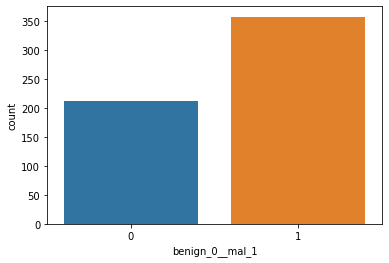

In [27]:
sns.countplot(x='benign_0__mal_1',data=df)

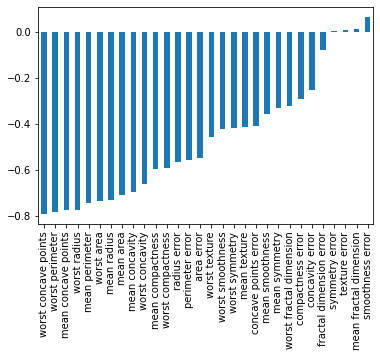

In [28]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

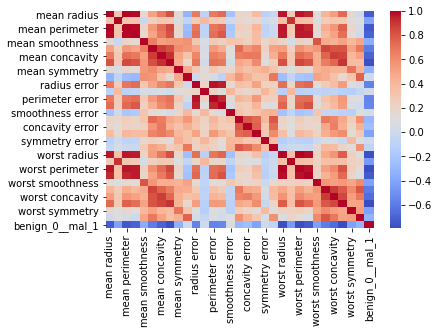

In [29]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [0]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Scaling Data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

# Creating Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  



In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [38]:
X_train.shape

(398, 30)

In [0]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#binary classification 

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [40]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 0s 15ms/step - loss: 0.6611 - val_loss: 0.6416
Epoch 2/600
13/13 [==============================] - 0s 15ms/step - loss: 0.6283 - val_loss: 0.6132
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5980 - val_loss: 0.5820
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5618 - val_loss: 0.5478
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5234 - val_loss: 0.5049
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4836 - val_loss: 0.4650
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4460 - val_loss: 0.4266
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4065 - val_loss: 0.3940
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3689 - val_loss: 0.3636
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3336 - val_loss: 0.3361
Epoch 1

In [0]:
losses = pd.DataFrame(model.history.history)

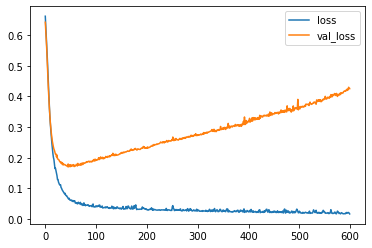

In [42]:
losses.plot()

This tells us we are overfitting. Validation loss increases

# Early Stopping

In [0]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#binary classification 

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [46]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 9ms/step - loss: 0.6615 - val_loss: 0.6465
Epoch 2/600
13/13 [==============================] - 0s 19ms/step - loss: 0.6134 - val_loss: 0.6081
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5698 - val_loss: 0.5711
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5377 - val_loss: 0.5339
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4899 - val_loss: 0.4983
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4576 - val_loss: 0.4638
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4141 - val_loss: 0.4285
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3732 - val_loss: 0.3954
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3436 - val_loss: 0.3647
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3140 - val_loss: 0.3370
Epoch 11

In [0]:
model_losses = pd.DataFrame(model.history.history)

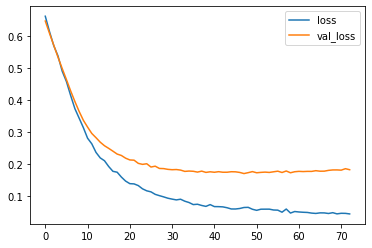

In [48]:
model_losses.plot()

# Dropout layer


In [0]:
from tensorflow.keras.layers import Dropout

In [0]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#binary classification 

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [56]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 10ms/step - loss: 0.7585 - val_loss: 0.6971
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.7292 - val_loss: 0.6809
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6887 - val_loss: 0.6693
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6605 - val_loss: 0.6587
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6666 - val_loss: 0.6446
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6621 - val_loss: 0.6292
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6361 - val_loss: 0.6119
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6107 - val_loss: 0.5920
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6064 - val_loss: 0.5691
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5685 - val_loss: 0.5424
Epoch 11

In [0]:
model_loss = pd.DataFrame(model.history.history)

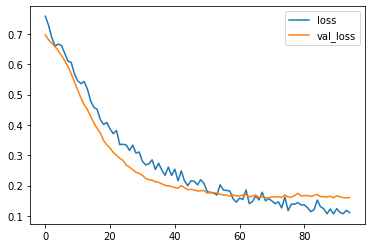

In [59]:
model_loss.plot()

# Model prediction and evaluation

In [60]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [63]:
print(confusion_matrix(y_test,predictions))

[[ 63   3]
 [  1 104]]
